In [1]:
#!pip install geopy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
# from ner_hf import *
import ast 
from scipy import stats
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}
plt.rc('font', **font)

In [5]:
# load set of annotations

# def load_anns(path_ner, path_flan_anns):
def load_anns():
    anns = pd.read_json('/home/brihi/characterizing-attitudes-towards-homelessness/original_twitter_data/ner_dump.jsonl', lines=True)
#     anns = pd.read_json(path_ner, lines=True)

    print("read anns")
    print("starting to read flan anns")
    flan_anns = pd.read_json("/home/brihi/characterizing-attitudes-towards-homelessness/original_twitter_data/all_3mil_flan_preds.jsonl", lines=True)
#     flan_anns = pd.read_json(path_flan_anns, lines=True)

    print("read both anns and flan anns")
    flags = []

    for idx, row in flan_anns.iterrows():
        if idx % 10000 == 0:
            print(idx)
        finer = row['finer_updated']
        if len(finer) == 0 or '0' in finer or finer=='[]':
            flags.append(False)
        else:
            flags.append(True)
    flan_anns = flan_anns[flags]
    ret_anns = anns
    ret_anns['finer_updated'] = flan_anns.iloc[ret_anns.index]['finer_updated']


    print(ret_anns.shape)
    ret_anns = ret_anns.reset_index()
    ret_anns['idx'] = ret_anns.index
    return ret_anns


In [6]:
anns = load_anns()
# path_ner = ''
# path_flan = ''
# anns = load_anns(path_ner, path_flan)

df = anns



read anns
starting to read flan anns
read both anns and flan anns
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000


In [11]:
us_states_mapping_corre = {'Alabama':'AL', 
                     'Alaska':'AK',
                     'Arizona':'AZ', 
                     'Arkansas':'AR', 
                     'California':'CA', 
                     'Colorado':'CO', 
                     'Connecticut':'CT', 
                     'Delaware':'DE', 
                     'Florida':'FL', 
                     'Georgia':'GA', 
                     'Hawaii':'HI', 
                     'Idaho':'ID', 
                     'Illinois':'IL', 
                     'Indiana':'IN',
                     'Iowa':'IA', 
                     'Kansas':'KS', 
                     'Kentucky':'KY',
                     'Louisiana':'LA', 
                     'Maine':'ME', 
                     'Maryland':'MD', 
                     'Massachusetts':'MA', 
                     'Michigan':'MI', 
                     'Minnesota':'MN', 
                     'Mississippi':'MS', 
                     'Missouri':'MO', 
                     'Montana':'MT', 
                     'Nebraska':'NE', 
                     'Nevada':'NV',
                     'New Hampshire':'NH', 
                     'New Jersey':'NJ', 
                     'New Mexico':'NM', 
                     'New York':'NY',
                     'North Carolina':'NC', 
                     'North Dakota':'ND', 
                     'Ohio':'OH', 
                     'Oklahoma':'OK', 
                     'Oregon':'OR', 
                     'Pennsylvania':'PA', 
                     'Rhode Island':'RI', 
                     'South Carolina':'SC',
                     'South Dakota':'SD', 
                     'Tennessee':'TN', 
                     'Texas':'TX', 
                     'Utah':'UT', 
                     'Vermont':'VT', 
                     'Virginia':'VA',
                     'Washington':'WA', 
                     'West Virginia':'WV', 
                     'Wisconsin':'WI', 
                     'Wyoming':'WY', 
                     'District of Columbia':'DC'}

# Regression Analysis

In [7]:
# us_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Inidana',
#             'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
#             'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
#             'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'District of Columbia']

%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
# change cost of living stats, make plot with/without bubble sizes 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.legend_handler import HandlerPathCollection
np.random.seed(9876789)

us_states = ['California', 'New York', 'Texas', 'Washington', 'Oregon', 'Florida', 'Illinois', 'Colorado', 'Arizona', 'District of Columbia']
us_states_mapping = {'Alabama':'AL', 
                     'Alaska':'AK',
                     'Arizona':'AZ', 
                     'Arkansas':'AR', 
                     'California':'CA', 
                     'Colorado':'CO', 
                     'Connecticut':'CT', 
                     'Delaware':'DE', 
                     'Florida':'FL', 
                     'Georgia':'GA', 
                     'Hawaii':'HI', 
                     'Idaho':'ID', 
                     'Illinois':'IL', 
                     'Inidana':'IN',
                     'Iowa':'IA', 
                     'Kansas':'KS', 
                     'Kentucky':'KY',
                     'Louisiana':'LA', 
                     'Maine':'ME', 
                     'Maryland':'MD', 
                     'Massachusetts':'MA', 
                     'Michigan':'MI', 
                     'Minnesota':'MN', 
                     'Mississippi':'MS', 
                     'Missouri':'MO', 
                     'Montana':'MT', 
                     'Nebraska':'NE', 
                     'Nevada':'NV',
                     'New Hampshire':'NH', 
                     'New Jersey':'NJ', 
                     'New Mexico':'NM', 
                     'New York':'NY',
                     'North Carolina':'NC', 
                     'North Dakota':'ND', 
                     'Ohio':'OH', 
                     'Oklahoma':'OK', 
                     'Oregon':'OR', 
                     'Pennsylvania':'PA', 
                     'Rhode Island':'RI', 
                     'South Carolina':'SC',
                     'South Dakota':'SD', 
                     'Tennessee':'TN', 
                     'Texas':'TX', 
                     'Utah':'UT', 
                     'Vermont':'VT', 
                     'Virginia':'VA',
                     'Washington':'WA', 
                     'West Virginia':'WV', 
                     'Wisconsin':'WI', 
                     'Wyoming':'WY', 
                     'District of Columbia':'DC'}

codes_updated = ['government_critique', 'money_aid_resource_allocation', 'societal_critique', 
                 'solutions_interventions', 'personal_interaction_observation_of_homelessness',
                 'media_portrayal','not_in_my_backyard','deserving_undeserving_of_resources',
                 'harmful_generalization']
# for each state, for each frame, aggregate frequency of frame / total number of posts with that state

def count_finer(df):
    all_finer = df['finer_updated'].tolist()
    all_finer_counts = {}
    for finer_label in all_finer:
        try:
            finer_label_preproc = finer_label
            for lab in finer_label_preproc:
                if lab not in all_finer_counts:
                    all_finer_counts[lab] = 0
                all_finer_counts[lab]+=1
        except:
            continue 
    return all_finer_counts
                

In [8]:
r2 = []

mapping = {'deserving_undeserving_of_resources': '(Un)Deserv.', 
           'government_critique': 'GovCrit.', 
           'money_aid_resource_allocation': 'MoneyAid.',
           'solutions_interventions': 'SolnInt.', 
           'societal_critique': 'SocCrit.', 
           'harmful_generalization': 'HarmGen.', 
           'personal_interaction_observation_of_homelessness': 'Interact.',
           'not_in_my_backyard': 'NIMBY',
           'media_portrayal': 'MediaPort.'}
    
def plot_regression(X, y, state, freq, heading, code, ax, line_color, point_color, label, marker, first=False):  
    X_intercept = sm.add_constant(X)
    model = sm.OLS(y, X_intercept)
    results = model.fit()
    r_squared = results.rsquared

    X_plot = np.linspace(min(X)[0], max(X)[0], 100)
    X_plot_with_intercept = sm.add_constant(X_plot)
    y_plot = results.predict(X_plot_with_intercept)
    
    predictions = results.get_prediction(X_plot_with_intercept)
    prediction_summary_frame = predictions.summary_frame(alpha=0.05)

    sizes = freq
    ax.set_facecolor('white')

    scatter = ax.scatter(X, y, s=300, color=point_color, marker=marker, alpha=0.6, edgecolors='w', linewidth=0.5)

    
    for i in range(len(X)):
        if first == True:
            ax.plot([X[i], X[i]], [y[i], y[i] + 0.02], color='black', linewidth=0.5)
            ax.text(X[i], y[i] + 0.02, state[i], fontsize=17, ha='right', va='bottom', weight='bold')
        else:
#             ax.plot([X[i], X[i]], [y[i], y[i] - 0.02], color='black', linewidth=0.5)
#             ax.text(X[i], y[i] - 0.04, state[i], fontsize=17, ha='left', va='bottom', weight='bold')
            ax.plot([X[i], X[i]], [y[i], y[i] + 0.02], color='black', linewidth=0.5)
            ax.text(X[i], y[i] + 0.02, state[i], fontsize=17, ha='right', va='bottom', weight='bold')

    ax.plot(X_plot, prediction_summary_frame['mean'], color=line_color, label=label + f' (R^2: {r_squared:.2f})')
    se_line = prediction_summary_frame['mean_se']
    lower_bound = y_plot.flatten() - se_line
    upper_bound = y_plot.flatten() + se_line
    ax.fill_between(X_plot, lower_bound, upper_bound, color=line_color, alpha=0.1)
    

all_heading = []
frame = []

def regression_run_unsheltered(stats, heading):
    fig, ax = plt.subplots(figsize=(8, 6))

    colors = plt.cm.tab10(np.linspace(0, 1, 10))
    line_colors = ['#2e8b57', '#800080']
#     line_colors = ['#1f77b4', '#ff7f0e']  # Blue and Orange

    markers = ['o', '*']  # Different markers for each line


#     codes_plot = ['government_critique', 'solutions_interventions']
    codes_plot = ['deserving_undeserving_of_resources', 'harmful_generalization']

    for i, code in enumerate(codes_plot):
        all_heading.append(heading)
        frame.append(code)
        
        df_frame_sub = proportions_df[proportions_df['frame'] == code]
        combined_result = pd.merge(stats, df_frame_sub, on="State", how='left')
        combined_result = combined_result.fillna(0)
        
        mapped = [us_states_mapping[t] for t in us_states]
        combined_result = combined_result[combined_result['State'].isin(mapped)]

        x = np.array(combined_result[heading].tolist()).reshape(len(combined_result[heading].tolist()), 1)
        y = np.array(combined_result['proportion'].tolist()).reshape(len(combined_result['proportion'].tolist()), 1)

        if i==0:
            plot_regression(x, y, combined_result['State'].tolist(), combined_result['freq'].tolist(), heading, code, ax, line_colors[i], line_colors[i], mapping[code], markers[i], first=True)
        else:
            plot_regression(x, y, combined_result['State'].tolist(), combined_result['freq'].tolist(), heading, code, ax, line_colors[i], line_colors[i], mapping[code],markers[i], first=False)


    ax.set_xlabel('Percent of Unsheltered PEH', fontsize=20)
#     ax.set_xlabel('Cost of Living Index', fontsize=20)

    ax.set_ylabel('Proportion of Posts \n Labeled with Frame', fontsize=20)
    ax.set_ylim([0, 0.65])
    ax.tick_params(axis='x', labelsize=20)  # Increase font size of x-axis tick labels
    ax.tick_params(axis='y', labelsize=20)  # Increase font size of y-axis tick labels

    ax.legend(fontsize=20, loc='upper left', frameon=False)
    
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
#     plt.savefig('percent_unsheltered.pdf', dpi=300)

    plt.show()

    
def regression_run_cost(stats, heading):
    fig, ax = plt.subplots(figsize=(8, 6))

    colors = plt.cm.tab10(np.linspace(0, 1, 10))
#     line_colors = ['#2e8b57', '#800080']
    line_colors = ['#1f77b4', '#ff7f0e']  # Blue and Orange
    
    markers = ['o', '*']  # Different markers for each line



    codes_plot = ['government_critique', 'solutions_interventions']
#     codes_plot = ['deserving_undeserving_of_resources', 'harmful_generalization']

    for i, code in enumerate(codes_plot):
        all_heading.append(heading)
        frame.append(code)
        
        df_frame_sub = proportions_df[proportions_df['frame'] == code]
        combined_result = pd.merge(stats, df_frame_sub, on="State", how='left')
        combined_result = combined_result.fillna(0)
        
        mapped = [us_states_mapping[t] for t in us_states]
        combined_result = combined_result[combined_result['State'].isin(mapped)]

        x = np.array(combined_result[heading].tolist()).reshape(len(combined_result[heading].tolist()), 1)
        y = np.array(combined_result['proportion'].tolist()).reshape(len(combined_result['proportion'].tolist()), 1)

        if i==0:
            plot_regression(x, y, combined_result['State'].tolist(), combined_result['freq'].tolist(), heading, code, ax, line_colors[i], line_colors[i], mapping[code], markers[i], first=True)
        else:
            plot_regression(x, y, combined_result['State'].tolist(), combined_result['freq'].tolist(), heading, code, ax, line_colors[i], line_colors[i], mapping[code],markers[i], first=False)


#     ax.set_xlabel('Percent of Unsheltered PEH', fontsize=20)
    ax.set_xlabel('Cost of Living Index', fontsize=20)

    ax.set_ylabel('Proportion of Posts \n Labeled with Frame', fontsize=20)
    ax.set_ylim([0, 0.65])
    ax.tick_params(axis='x', labelsize=20)  # Increase font size of x-axis tick labels
    ax.tick_params(axis='y', labelsize=20)  # Increase font size of y-axis tick labels

    ax.legend(fontsize=20, loc='lower left', frameon=False)
    
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
#     plt.savefig('cost_of_living.pdf', dpi=300)

    plt.show()

In [9]:
state_list = []
frame_list = []
proportion = []
state_freq = []

for state in us_states:
    df_state_sub = df[df[state] == 1]
    df_state_sub_finer = count_finer(df_state_sub)
    
    for code in codes_updated:
        if code not in df_state_sub_finer:
            proportion.append(0)
        else:
            proportion.append(df_state_sub_finer[code]/df_state_sub.shape[0])
        frame_list.append(code)
    for i in range(9):
        state_list.append(us_states_mapping[state])
        state_freq.append(df_state_sub.shape[0])

        

proportions_df = pd.DataFrame({'State':state_list, 'frame': frame_list, 'proportion':proportion, 'freq':state_freq})
# proportions_df.to_csv('state_proportions.csv')


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


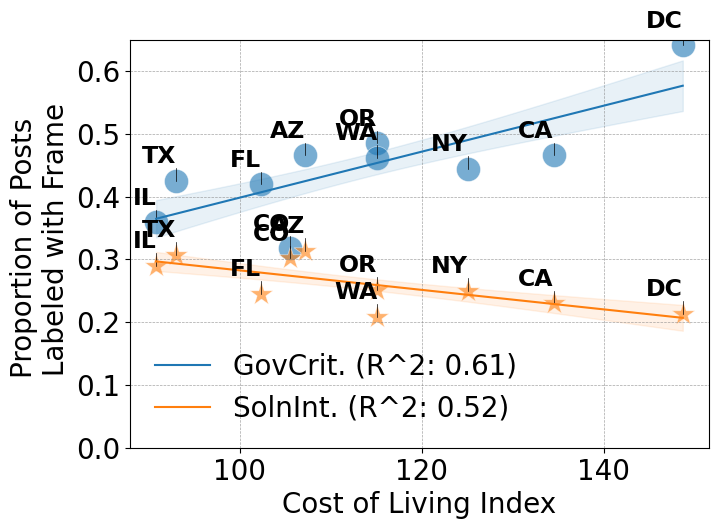

In [12]:
cost_of_living_2024 = pd.read_csv('cost-of-living-index-by-state-2024.csv')
sta = cost_of_living_2024['state'].tolist()
sta_up = []
for st in sta:
    sta_up.append(us_states_mapping_corre[st])
cost_of_living_2024['State'] = sta_up

regression_run_cost(cost_of_living_2024, 'CostOfLivingIndex2023')


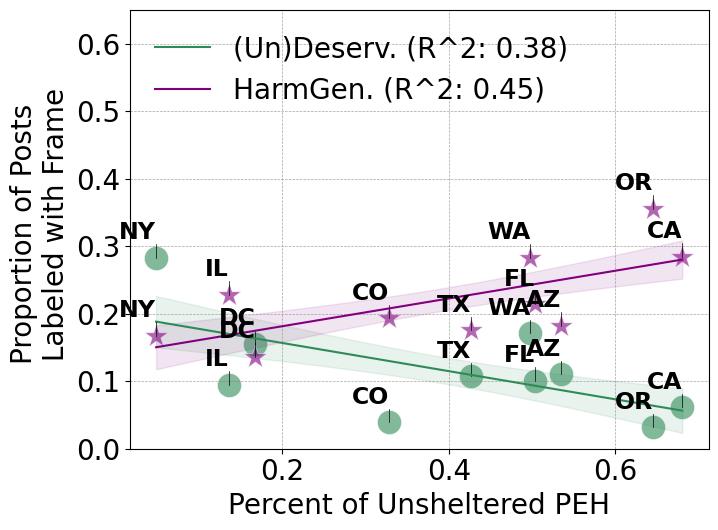

In [13]:
hud_stats = pd.read_csv('hud_sub.csv')
hud_stats = hud_stats.drop([56, 12, 42, 50,3, 27]).reset_index()

regression_run_unsheltered(hud_stats, 'percent unsheltered')